# Primer corte del proyecto final de Estadística

### Tema de la BD: 
Consumo cultural en los jóvenes cubanos. Los datos fueron obtenidos mediante la realización de una encuesta.

### Integrantes:
- Ariadna Velázquez Rey  C311
- Lia Stephanie López Rosales  C312
- Raidel Miguel Cabellud Lizaso  C311

## Importación de las librerías necesarias

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from itertools import chain

## 1. Carga de datos

In [95]:
archivo = './Consumo_Cultural_en_Cuba.xlsx'  # Ruta al archivo proporcionado
df = pd.read_excel(archivo)

## 2. Normalización de "Géneros musicales favoritos"

In [96]:
# Función para separar y normalizar los géneros musicales
def normalizar_generos(df, columna, separador=','):
    # Crear una lista de listas con los géneros separados
    generos_separados = df[columna].dropna().apply(lambda x: [g.strip() for g in x.split(separador)])
    
    # Desplegar la lista y crear un DataFrame
    generos_planos = list(chain(*generos_separados))
    genero_frecuencia = pd.Series(generos_planos).value_counts().reset_index()
    genero_frecuencia.columns = ['Genero', 'Frecuencia']
    
    return genero_frecuencia

In [97]:
# Aplicar la normalización
df_generos_normalizados = normalizar_generos(df, 'Géneros musicales favoritos')
print("Generos musicales normalizados:")
print(df_generos_normalizados['Genero'].value_counts())

Generos musicales normalizados:
Genero
Pop                                       1
Lo-Fi                                     1
alt rock                                  1
post punk                                 1
Romántico                                 1
                                         ..
Country                                   1
indie latino                              1
Baladas románticas                        1
Alternative y R&B                         1
Timba ¿Cómo no va a estar en la lista?    1
Name: count, Length: 65, dtype: int64


## 3. Normalización de categorías similares en columnas

In [98]:
def normalizar_categorias(df, columna, mapeo):
    df[columna] = df[columna].replace(mapeo)
    return df

In [99]:
# Mapeos para normalizar nombres
mapeo_plataformas = {
    'SnapTube ': 'Snaptube',
    'La descargo por Snaptube': 'Snaptube',
    'descargadas desde snaptube': 'Snaptube',
    'Vidmate': 'VidMate'
}

mapeo_universidades = {
    'UH': 'Universidad de La Habana',
    'Universidad de La Habana': 'Universidad de La Habana',
    'Matcom': 'MATCOM',
    'Filosofía ': 'FHS'
}

In [100]:
# Aplicar mapeos
normalizar_categorias(df, 'Plataforma donde más consumes música', mapeo_plataformas)
normalizar_categorias(df, 'Universidad en que estudias', mapeo_universidades)

,Marca temporal,Universidad en que estudias,Facultad en que estudias,Qué edad tienes?,Vertiente cultural que màs consumes,Géneros musicales favoritos,Cantante o grupo favorito,Plataforma donde más consumes música,Géneros cinematográficos favoritos,Plataforma donde mas consumes cine,Película favorita,Gèneros literarios favoritos,Plataforma donde más consumes literatura,Escritor favorito,Arte plástica favorita,Plataforma donde más consumes artes plásticas,Artista plástico favorito
0,2024-07-07 09:37:08.497,Universidad de La Habana,MATCOM,22,Música,"Rock, Hip-Hop",Skillet,Spotify,"Aventura, Comedia, Terror",Telegram,I am Legend,Romance,Wattpad,Sarah M. James,Pintura,Pinterest,Vincent van Gogh
1,2024-07-07 09:43:45.764,Universidad de La Habana,Matcom,20,Música,"Rock, Hip-Hop, Trap, EDM, Experimental",Kanye West,Spotify,"Aventura, Comedia, Misterio",Paquete Semanal,Scott Pilgrim vs The World,"Fantasía, Misterio, Divulgación científica",Libros en Físico,Dan Brown,Pintura,Galerías de Arte,Salvador Dali
2,2024-07-07 09:56:11.729,Universidad de La Habana,FHS,20,Música,"Hip-Hop, Trap, EDM, Experimental",Porter Robinson,Telegram,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Galerías de Arte,NaN
3,2024-07-07 10:02:35.432,Universidad de La Habana,FBio,20,Música,"Rock, Hip-Hop, Blues",Maneskin,Spotify,"Acción, Comedia, Drama, Misterio",Netflix,Avatar,"Fantasía, Misterio, Suspenso, Literatura histo...",google,Brandon Sanderson,Artesanía,Pinterest,luo li rong
4,2024-07-07 10:08:25.765,Instituro Superior de Arte,Facultad de Arte de los Medios de Comunicación...,18,Cine,Experimental,Arca,Telegram,"Terror, Suspenso",Telegram,El Secreto de sus ojos,"Ficción, Poesía",Libros en Físico,Alice Walker,Pintura,Galerías de Arte,Fidelio Ponce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,2024-07-13 08:15:07.679,Universidad de La Habana,FCOM,19,Música,"Reggaetón, Pop, Rumba, Baladas románticas",Backstreet boys,Youtube,Comedia,Telegram,Shrek 2👺,Literatura historíca,Libros en Físico,NaN,Pintura,Galerías de Arte,NaN
168,2024-07-14 17:30:14.671,ISA,Artes visuales,18,Fotografía,"Rock, Reggaetón, Hip-Hop, Trap, Jazz, Trova, E...",Red Hot Chilli Pepers,Youtube,"Drama, Terror, Suspenso, Misterio",Copia de películas entre amigos,(Imposible decidir por una),Bizarro,Telegram,Agustina Bazterrica,Fotografía,Pinterest,Gustav Klint
169,2024-07-14 20:53:27.484,Universidad de La Habana,Filosofía,19,Cine,"Rock, Jazz, Trova,",Jokki,Telegram,"Comedia, Drama, Musical",En mi casa,Across the universe,"Poesía, Fantasía",Libros en Físico,Mempo Giardinelli,Artesanía,Instagram,Amelia Peláez
170,2024-07-15 22:26:07.657,UM,FTur,19,Cine,Rock,Radiohead,Telegram,"Drama, Terror",Telegram,Vértigo,Suspenso,Telegram,George Orwell,NaN,Youtube,NaN


## 4. Exploración de datos

- ### Inspección inicial

Información general del dataset:

In [101]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Marca temporal                                 172 non-null    datetime64[ns]
 1   Universidad en que estudias                    171 non-null    object        
 2   Facultad en que estudias                       171 non-null    object        
 3   Qué edad tienes?                               172 non-null    int64         
 4   Vertiente cultural que màs consumes            172 non-null    object        
 5   Géneros musicales favoritos                    168 non-null    object        
 6   Cantante o grupo favorito                      141 non-null    object        
 7   Plataforma donde más consumes música           171 non-null    object        
 8   Géneros cinematográficos favoritos             169 non-null 

Primeras filas del dataset:

In [102]:
print(df.head())

           Marca temporal Universidad en que estudias  \
0 2024-07-07 09:37:08.497    Universidad de La Habana   
1 2024-07-07 09:43:45.764    Universidad de La Habana   
2 2024-07-07 09:56:11.729    Universidad de La Habana   
3 2024-07-07 10:02:35.432    Universidad de La Habana   
4 2024-07-07 10:08:25.765  Instituro Superior de Arte   

                            Facultad en que estudias  Qué edad tienes?  \
0                                             MATCOM                22   
1                                             Matcom                20   
2                                                FHS                20   
3                                               FBio                20   
4  Facultad de Arte de los Medios de Comunicación...                18   

  Vertiente cultural que màs consumes             Géneros musicales favoritos  \
0                              Música                           Rock, Hip-Hop   
1                              Música  Rock, Hip-H

- ### Descripción estadística básica

In [103]:
print(df.describe())

                      Marca temporal  Qué edad tienes?
count                            172        172.000000
mean   2024-07-08 04:46:52.402575872         20.104651
min       2024-07-07 09:37:08.497000         17.000000
25%    2024-07-07 11:09:35.190500096         19.000000
50%    2024-07-07 13:52:34.668499968         20.000000
75%    2024-07-08 06:32:28.616750080         21.000000
max       2024-07-24 11:45:22.526000         26.000000
std                              NaN          1.506548


- ### Verificar valores nulos

In [104]:
print(df.isnull().sum())

Marca temporal                                    0
Universidad en que estudias                       1
Facultad en que estudias                          1
Qué edad tienes?                                  0
Vertiente cultural que màs consumes               0
Géneros musicales favoritos                       4
Cantante o grupo favorito                        31
Plataforma donde más consumes música              1
Géneros cinematográficos favoritos                3
Plataforma donde mas consumes cine               10
Película favorita                                37
Gèneros literarios favoritos                      8
Plataforma donde más consumes literatura         14
Escritor favorito                                54
Arte plástica favorita                           27
Plataforma donde más consumes artes plásticas    23
Artista plástico favorito                        84
dtype: int64


- ### Identificar valores atípicos con un boxplot para variables numéricas

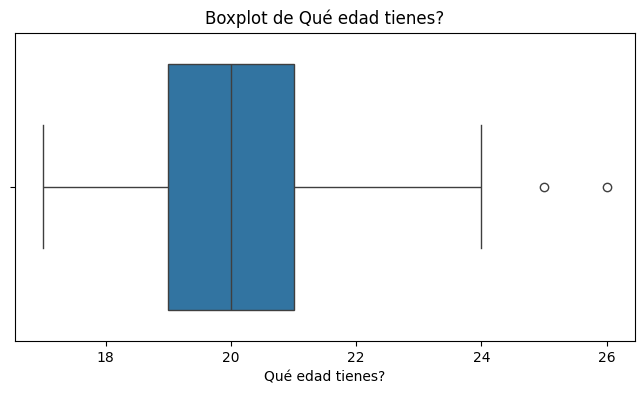

In [105]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot de {col}')
    plt.show()

## 5. Medidas de tendencia central (media, mediana, moda)


In [106]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    print(f"{col}:")
    print(f"  Media: {df[col].mean()}")
    print(f"  Mediana: {df[col].median()}")
    print(f"  Moda: {df[col].mode()[0]}\n")

Qué edad tienes?:
  Media: 20.1046511627907
  Mediana: 20.0
  Moda: 20



## 6. Medidas de dispersión (varianza, desviación estándar, rango)


In [107]:
for col in numeric_cols:
    rango = df[col].max() - df[col].min()
    print(f"{col}:")
    print(f"Varianza: {df[col].var()}")
    print(f"Desviación estándar: {df[col].std()}")
    print(f"Rango: {rango}\n")

Qué edad tienes?:
Varianza: 2.2696858425132596
Desviación estándar: 1.5065476569007896
Rango: 9



## 7. Visualización

- ### Histogramas

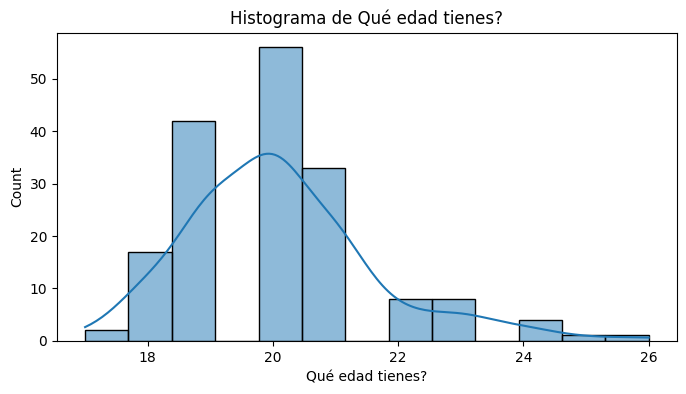

In [108]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histograma de {col}')
    plt.show()

- ### Diagrama de dispersión para cada par de variables numéricas

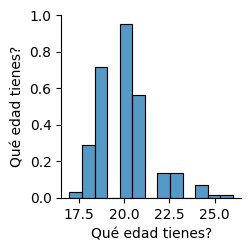

In [109]:
sns.pairplot(df[numeric_cols])
plt.show()

- ### Boxplots para todas las variables numéricas

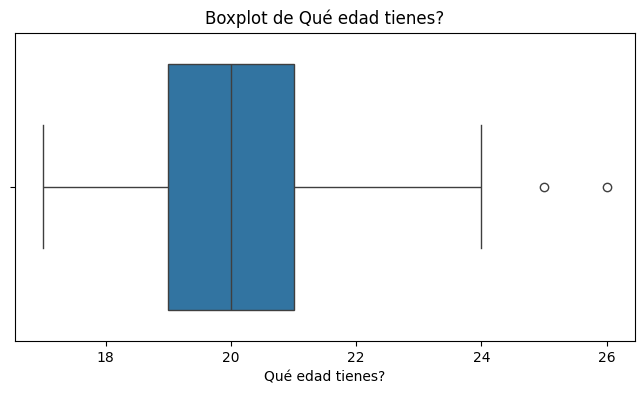

In [110]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot de {col}')
    plt.show()

## 8. Estimadores

- ### Estimación Puntual (Máxima Verosimilitud)

In [111]:
for col in numeric_cols:
    media_mle = df[col].mean()
    desv_std_mle = df[col].std()
    print(f"Columna: {col}")
    print(f"Media (MLE): {media_mle}")
    print(f"Desviación estándar (MLE): {desv_std_mle}")

Columna: Qué edad tienes?
Media (MLE): 20.1046511627907
Desviación estándar (MLE): 1.5065476569007896


- ### Intervalos de Confianza

In [112]:
from scipy.stats import norm

alpha = 0.05  # Nivel de confianza
for col in numeric_cols:
    media = df[col].mean()
    std_err = df[col].std() / (len(df[col]) ** 0.5)  # Error estándar
    ci = norm.interval(1 - alpha, loc=media, scale=std_err)
    print(f"Columna: {col}")
    print(f"Intervalo de confianza al 95%: {ci}")
    
# Crear una columna binaria: menciona 'Rock' o no
rock_present = df['Géneros musicales favoritos'].dropna().apply(lambda x: 1 if 'Rock' in x else 0)

# Calcular proporción y su intervalo de confianza
p_hat = rock_present.mean()  # proporción
n = len(rock_present)
se = np.sqrt((p_hat * (1 - p_hat)) / n)  # error estándar
z = 1.96  # z para 95% de confianza

ci_lower = p_hat - z * se
ci_upper = p_hat + z * se

print("\nIntervalo de Confianza para proporción de 'Rock':")
print(f"Proporción: {p_hat:.4f}, Intervalo: [{ci_lower:.4f}, {ci_upper:.4f}]")

Columna: Qué edad tienes?
Intervalo de confianza al 95%: (19.87950386346218, 20.329798462119218)

Intervalo de Confianza para proporción de 'Rock':
Proporción: 0.4702, Intervalo: [0.3948, 0.5457]


## 9. Pruebas de hipótesis

- ### Hipótesis 1: Comprobar si la media de una variable difiere significativamente de un valor hipotético

In [113]:
columna = numeric_cols[0]  # Seleccionar una variable numérica
hipotetico = df[columna].mean() * 1.1  # Ejemplo: media esperada es 10% mayor que la observada
stat, p_value = stats.ttest_1samp(df[columna].dropna(), hipotetico)
print(f"\nHipótesis 1: ¿La media de \"{columna}\" es igual a {hipotetico}?")
print(f"Estadístico de prueba: {stat}")
print(f"p-valor: {p_value}")
if p_value < 0.05:
    print("Rechazamos la hipótesis nula (media diferente).")
else:
    print("No podemos rechazar la hipótesis nula (media igual).")


Hipótesis 1: ¿La media de "Qué edad tienes?" es igual a 22.11511627906977?
Estadístico de prueba: -17.501605534834873
p-valor: 5.804368873451156e-40
Rechazamos la hipótesis nula (media diferente).


- ### Hipótesis 2: Comparar las medias de dos grupos

In [114]:
grupo_1 = df[columna].sample(frac=0.5, random_state=1)
grupo_2 = df[columna].sample(frac=0.5, random_state=2)
stat, p_value = stats.ttest_ind(grupo_1, grupo_2)
print(f"\nHipótesis 2: ¿Las medias de dos grupos en \"{columna}\" son iguales?")
print(f"Estadístico de prueba: {stat}")
print(f"p-valor: {p_value}")
if p_value < 0.1:
    print("Rechazamos la hipótesis nula (medias diferentes).")
else:
    print("No podemos rechazar la hipótesis nula (medias iguales).")


Hipótesis 2: ¿Las medias de dos grupos en "Qué edad tienes?" son iguales?
Estadístico de prueba: -0.19240293792475044
p-valor: 0.8476562382039929
No podemos rechazar la hipótesis nula (medias iguales).


- ### Hipótesis 3: Comprobar si la distribución de una variable es normal

In [115]:
stat, p_value = stats.shapiro(df[columna].dropna())
print(f"\nHipótesis 3: ¿La variable \"{columna}\" sigue una distribución normal?")
print(f"Estadístico de prueba: {stat}")
print(f"p-valor: {p_value}")
if p_value < 0.05:
    print("Rechazamos la hipótesis nula (no es normal).")
else:
    print("No podemos rechazar la hipótesis nula (es normal).")


Hipótesis 3: ¿La variable "Qué edad tienes?" sigue una distribución normal?
Estadístico de prueba: 0.9107014401536149
p-valor: 9.909095839965357e-09
Rechazamos la hipótesis nula (no es normal).


### Hipótesis 4: Proporción de Spotify > 50%

In [116]:
spotify_present = df['Plataforma donde más consumes música'].dropna().apply(lambda x: 1 if 'Spotify' in x else 0)
spotify_proporcion = spotify_present.mean()

# Realizar prueba z
z_score = (spotify_proporcion - 0.5) / np.sqrt((0.5 * 0.5) / len(spotify_present))
p_value = 1 - stats.norm.cdf(z_score)

print("\nPrueba de Hipótesis: Proporción de Spotify > 50%")
print(f"Z-Score: {z_score:.4f}, P-Valor: {p_value:.4f}")
if p_value < 0.05:
    print("Rechazamos la hipótesis nula. La proporcion de usuarios de Spotify es significativamente mayor al 50%.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente de que la poporcion de usuarios de Spotify supere el 50%.")


Prueba de Hipótesis: Proporción de Spotify > 50%
Z-Score: -10.1708, P-Valor: 1.0000
No podemos rechazar la hipótesis nula. No hay evidencia suficiente de que la poporcion de usuarios de Spotify supere el 50%.


### Hipótesis 5: Spotify vs. Telegram

In [117]:
telegram_present = df['Plataforma donde más consumes música'].dropna().apply(lambda x: 1 if 'Telegram' in x else 0)

# Proporciones y tamaños
p1, p2 = spotify_present.mean(), telegram_present.mean()
n1, n2 = len(spotify_present), len(telegram_present)

# Estadístico z para diferencia de proporciones
p_combined = (p1 * n1 + p2 * n2) / (n1 + n2)
se_combined = np.sqrt(p_combined * (1 - p_combined) * (1/n1 + 1/n2))
z_diff = (p1 - p2) / se_combined
p_diff = 2 * (1 - stats.norm.cdf(abs(z_diff)))

print("\nPrueba de Hipótesis: Spotify vs Telegram")
print(f"Z-Score: {z_diff:.4f}, P-Valor: {p_diff:.4f}")
if p_diff < 0.05:
    print("Conclusión: Recazamos la hipótesis nula. Hay una diferencia significativa entre las proporciones de usuarios de Spotify y Telegram.")
else:
    print("Conclusión: No se rechaza la hipótesis nula. No hay evidencia suficiente de una evidencia significativa entre las proporciones de usuarios de Sotify y Telegram.")



Prueba de Hipótesis: Spotify vs Telegram
Z-Score: -7.5646, P-Valor: 0.0000
Conclusión: Recazamos la hipótesis nula. Hay una diferencia significativa entre las proporciones de usuarios de Spotify y Telegram.


## 9.1 Tablas de Contingencia y Tests

In [118]:
# Crear tabla de contingencia entre 'Vertiente cultural' y 'Plataforma de música'
tabla_contingencia = pd.crosstab(df['Vertiente cultural que màs consumes'],
                                df['Plataforma donde más consumes música'])

### Test de Independencia

In [119]:
chi2, p_chi2, dof, expected = stats.chi2_contingency(tabla_contingencia)

print("\nTest de Independencia:")
print(f"Chi-cuadrado: {chi2:.4f}, P-Valor: {p_chi2:.4f}")
print("Tabla de Contingencia:")
print(tabla_contingencia)


Test de Independencia:
Chi-cuadrado: 40.2015, P-Valor: 0.4613
Tabla de Contingencia:
Plataforma donde más consumes música  Apple Music  Deezer  Paquete Semanal  \
Vertiente cultural que màs consumes                                          
Artes Plásticas                                 1       0                0   
Cine                                            0       2                0   
Fotografía                                      1       1                0   
Literatura                                      0       3                0   
Moda                                            0       0                0   
Música                                          2       9                1   

Plataforma donde más consumes música  Snaptube  Spotify  Telegram  VidMate  \
Vertiente cultural que màs consumes                                          
Artes Plásticas                              0        1         0        0   
Cine                                         0        4

### Test de Homogeneidad

In [120]:
# Comparar la distribución de 'Plataforma donde más consumes música' entre dos vertientes culturales
vertientes_filtradas = df['Vertiente cultural que màs consumes'].dropna().unique()[:2]
sub_df = df[df['Vertiente cultural que màs consumes'].isin(vertientes_filtradas)]

homogeneidad_tabla = pd.crosstab(sub_df['Vertiente cultural que màs consumes'],
                                sub_df['Plataforma donde más consumes música'])

chi2_hom, p_hom, dof_hom, expected_hom = stats.chi2_contingency(homogeneidad_tabla)

print("\nTest de Homogeneidad:")
print(f"Chi-cuadrado: {chi2_hom:.4f}, P-Valor: {p_hom:.4f}")


Test de Homogeneidad:
Chi-cuadrado: 3.6518, P-Valor: 0.8871
